In [ ]:
#KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("kmeans.csv")
x = dataset.iloc[:,[3,4]].values

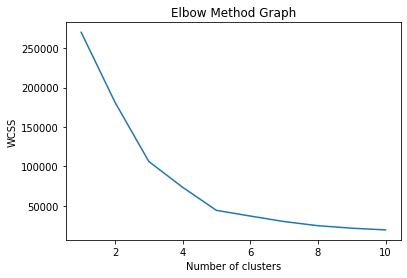

In [ ]:
from sklearn.cluster import KMeans  
import warnings
warnings.filterwarnings("ignore")
wcss_list= []  #Initializing the list for the values of WCSS  

#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('Elbow Method Graph')  
plt.xlabel('Number of clusters')  
plt.ylabel('WCSS')  
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

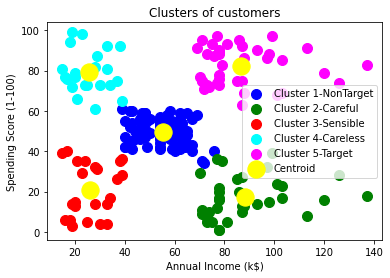

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1-NonTarget') #for first cluster  
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2-Careful') #for second cluster  
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3-Sensible') #for third cluster  
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4-Careless') #for fourth cluster  
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5-Target') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

without library

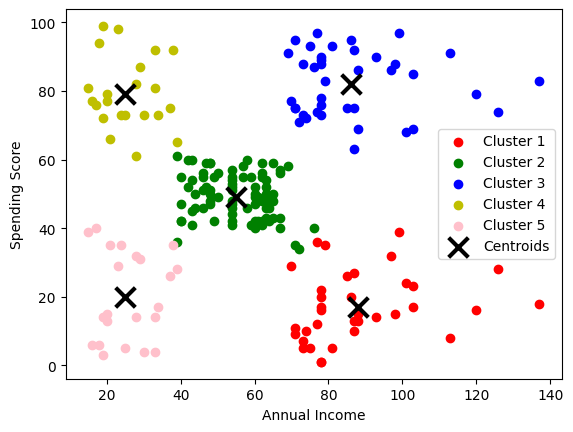

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(X, K, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    
    for i in range(max_iters):
        # Assign points to nearest centroid
        distances = np.sqrt(np.sum((X[:, np.newaxis, :] - centroids) ** 2, axis=2))
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        for k in range(K):
            centroids[k] = np.mean(X[labels == k], axis=0)
    
    return labels, centroids
import pandas as pd
dataset = pd.read_csv("kmeans.csv")
X = dataset.iloc[:,[3,4]].values
# Apply K-means algorithm
labels, centroids = k_means(X, K=5)

# Plot the clusters and centroids
colors = ['r', 'g', 'b','y','pink']
for i in range(5):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()